# Instructions:
To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

# Question 2: Predicting Building Energy Efficiency
## Objective:
Apply regression techniques using Scikit-learn to analyze and predict the energy efficiency
of buildings, focusing on heating and cooling load requirements. This involves the use of
various regression models, feature engineering, and model evaluation.
## Dataset:
The dataset for this assignment, Energy Efficiency Dataset, can be found at the UCI
Machine Learning Repository. It includes architectural features and energy efficiency
metrics of buildings. The dataset columns are renamed for clarity as follows:
```
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
```

All of the imports

In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample


#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import make_pipeline
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import confusion_matrix
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC # "Support vector classifier"

## Task 1
Data Preprocessing:
- Perform exploratory data analysis (EDA) after loading the dataset.
- Conduct feature engineering if necessary.


In [32]:
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X1 = energy_efficiency.data.features 
y1 = energy_efficiency.data.targets 
  
# metadata 
print("Source data metadata:")
print(energy_efficiency.metadata) 
  
# variable information
print("")
print("Source data variable information:")
print(energy_efficiency.variables)

# X descriptive statistics 
print("")
print("Feature descriptive statistics:")
print(X1.describe())

print("")
print("Target descriptive statistics:")
print(y1.describe())


Source data metadata:
{'uci_id': 242, 'name': 'Energy efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Sat Jan 27 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learnin

In [33]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
print("")
print("Renaming the columns per:")
print(column_names)
X = X1.rename(columns=column_names)
y = y1.rename(columns=column_names)
print("")
print("New X:")
print(X)
print("")
print("New y:")
print(y)


Renaming the columns per:
{'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

New X:
     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   

## Task 2
Model Development:
- Implement various regression models (Linear Regression, Ridge, Lasso, and
Elastic Net).
- Implement Random Forest Regression (Bonus Question - 5pts)
- Perform hyperparameter tuning for optimization.

### Task 2.1

Linear Regression

In [35]:
modelHeat = LinearRegression(fit_intercept=True)
modelHeat.fit(X, y['Heating_Load'])
y['Heating_Pred'] = modelHeat.predict(X)

print("")
print("Linear regression heating intercept:")
print(modelHeat.intercept_)
print("Linear regression heating coefficients:")
print(modelHeat.coef_)


Linear regression heating intercept:
84.02514989141984
Linear regression heating coefficients:
[-6.47799117e+01  5.16051850e+09 -5.16051850e+09 -1.03210370e+10
  4.16990185e+00 -2.33339527e-02  1.99326852e+01  2.03771530e-01]


<Axes: >

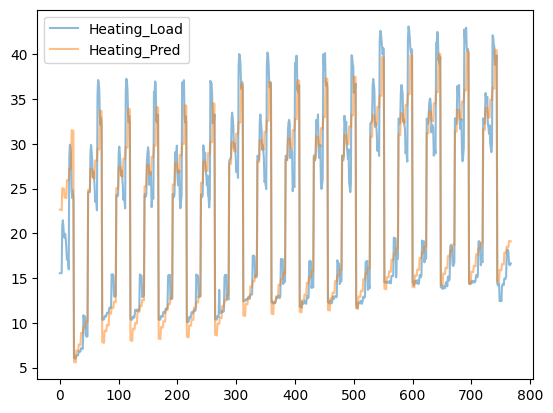

In [36]:
y[['Heating_Load', 'Heating_Pred']].plot(alpha=0.5)

In [37]:
params = pd.Series(modelHeat.coef_, index=X.columns)
params

Relative_Compactness        -6.477991e+01
Surface_Area                 5.160518e+09
Wall_Area                   -5.160518e+09
Roof_Area                   -1.032104e+10
Overall_Height               4.169902e+00
Orientation                 -2.333395e-02
Glazing_Area                 1.993269e+01
Glazing_Area_Distribution    2.037715e-01
dtype: float64

In [38]:
np.random.seed(1)
err = np.std([modelHeat.fit(*resample(X, y['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [39]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                                 effect         error
Relative_Compactness      -6.500000e+01  7.000000e+00
Surface_Area               5.160518e+09  8.850195e+11
Wall_Area                 -5.160518e+09  8.850195e+11
Roof_Area                 -1.032104e+10  1.770039e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation               -0.000000e+00  0.000000e+00
Glazing_Area               2.000000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


{Summarize}

In [40]:
modelCool = LinearRegression(fit_intercept=True)
modelCool.fit(X, y['Cooling_Load'])
y['Cooling_Pred'] = modelHeat.predict(X)

print("")
print("Linear regression cooling intercept:")
print(modelCool.intercept_)
print("Linear regression cooling coefficients:")
print(modelCool.coef_)


Linear regression cooling intercept:
97.29724952224059
Linear regression cooling coefficients:
[-7.08164916e+01  2.50910827e+10 -2.50910827e+10 -5.01821654e+10
  4.28367472e+00  1.21481499e-01  1.47170925e+01  4.06956166e-02]


<Axes: >

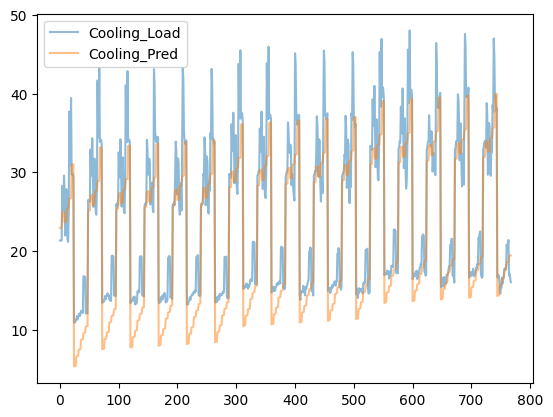

In [41]:
y[['Cooling_Load', 'Cooling_Pred']].plot(alpha=0.5)

In [42]:
params = pd.Series(modelCool.coef_, index=X.columns)
params

Relative_Compactness        -7.081649e+01
Surface_Area                 2.509108e+10
Wall_Area                   -2.509108e+10
Roof_Area                   -5.018217e+10
Overall_Height               4.283675e+00
Orientation                  1.214815e-01
Glazing_Area                 1.471709e+01
Glazing_Area_Distribution    4.069562e-02
dtype: float64

In [43]:
np.random.seed(1)
err = np.std([modelHeat.fit(*resample(X, y['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [44]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                                 effect         error
Relative_Compactness      -7.100000e+01  7.000000e+00
Surface_Area               2.509108e+10  9.697352e+11
Wall_Area                 -2.509108e+10  9.697352e+11
Roof_Area                 -5.018217e+10  1.939470e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation                0.000000e+00  0.000000e+00
Glazing_Area               1.500000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


The X axis here is essentially the list of houses. We do not have anything like year to use for the X axis, so I think the list of houses is OK. It might make a better graph if I sort them by the appropriate y value.

Gaussian Basis

### Task 2.2

Ridge

NameError: name 'x' is not defined

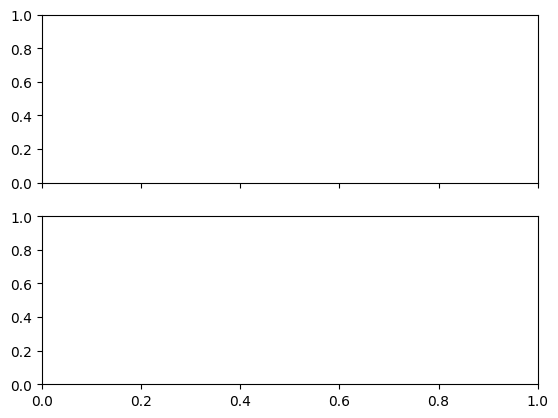

In [23]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')